<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Notebook-setup" data-toc-modified-id="Notebook-setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Notebook setup</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Functions</a></span><ul class="toc-item"><li><span><a href="#Functions-for-plotting-DFE" data-toc-modified-id="Functions-for-plotting-DFE-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Functions for plotting DFE</a></span></li></ul></li><li><span><a href="#Import-data" data-toc-modified-id="Import-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Import data</a></span><ul class="toc-item"><li><span><a href="#Inferred-s-and-mu-values" data-toc-modified-id="Inferred-s-and-mu-values-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Inferred s and mu values</a></span></li></ul></li><li><span><a href="#DFE-(Figure-2b)" data-toc-modified-id="DFE-(Figure-2b)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>DFE (Figure 2b)</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Including-mCAs-with-additional-mCA(s)" data-toc-modified-id="Including-mCAs-with-additional-mCA(s)-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Including mCAs with additional mCA(s)</a></span></li></ul></li></ul></li><li><span><a href="#DFE-of-mCAs-vs-SNVs-(Figure-6)" data-toc-modified-id="DFE-of-mCAs-vs-SNVs-(Figure-6)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>DFE of mCAs vs SNVs (Figure 6)</a></span></li><li><span><a href="#Calculating-total-mutatation-rate-for-each-class-of-mCA" data-toc-modified-id="Calculating-total-mutatation-rate-for-each-class-of-mCA-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Calculating total mutatation rate for each class of mCA</a></span></li></ul></div>

In [92]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Notebook setup

In [93]:
# imported packages
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.ticker import MultipleLocator
import pandas as pd   
import scipy
from scipy import integrate
import numpy as np

In [94]:
plt.style.use('cwpython.mplstyle') #use custom style file

In [95]:
#define the colors from colorbrewer2
orange1 = '#feedde'
orange2 = '#fdbe85'
orange3 = '#fd8d3c'
orange4 = '#e6550d'
orange5 = '#a63603'
blue1 = '#eff3ff'
blue2 = '#bdd7e7'
blue3 = '#6baed6'
blue4 = '#3182bd'
blue5 = '#08519c'
green1 = '#edf8e9'
green2 = '#bae4b3'
green3 = '#74c476'
green4 = '#31a354'
green5 = '#006d2c'
grey1 = '#f7f7f7'
grey2 = '#cccccc'
grey3 = '#969696'
grey4 = '#636363'
grey5 = '#252525'
purple1 = '#f2f0f7'
purple2 = '#cbc9e2'
purple3 = '#9e9ac8'
purple4 = '#756bb1'
purple5 = '#54278f'
red1 = '#fee5d9'
red2 = '#fcae91'
red3 = '#fb6a4a'
red4 = '#de2d26'
red5 = '#a50f15'

In [96]:
neutral_color='#fdbf6f'
gain_color = '#e31a1c'
loss_color = '#a6cee3'
multiple_gain = '#a50f15'
multiple_loss = '#1f78b4'
multiple_neutral = '#ff7f00'

In [97]:
mCA_color = 'lavender'
SNV_color = 'midnightblue'

In [98]:
loss_upper_limit_detection_s = 0.28
CNLOH_upper_limit_detection_s = 0.21

# Functions

## Functions for plotting DFE

In [99]:
mCA_color_dict = {'+': gain_color, '-': loss_color, '=': neutral_color, 'm+': multiple_gain, 'm-': multiple_loss, 'm=': multiple_neutral}

In [119]:
def plot_DFE_types_of_mCA(x_dict, mCA_type, multiples_included_or_not):
    fig, ax1 = plt.subplots(figsize=(8, 3.6), nrows=1, ncols=1)
    fig.subplots_adjust(hspace=0.3, wspace = 0.3)

    x_values = []
    labels = []
    annotate_y = []

    for k, v in x_dict.items():
        x = k
        base  = 0
        for mCA in v:
            if mCA[-1] == mCA_type:
                mu = y_dict[mCA]
                if mCA[0]=='m':
                    mCA_class = 'm'+mCA[-1]
                else:
                    mCA_class = mCA[-1]
                mCA_color = mCA_color_dict[mCA_class]

                if multiples_included_or_not == 'multiples included':
                    annotate_y.append(base+(0.5*mu))
                    x_values.append(x)
                    labels.append(mCA)
                    if mCA[0] == 'm':
                        ax1.bar(x, height = mu, bottom = base, color = mCA_color, align = 'center', width = 1, edgecolor = grey5, lw = 0.75, hatch = '////', zorder = 50)
                    else:
                        ax1.bar(x, height = mu, bottom = base, color = mCA_color, align = 'center', width = 1, edgecolor = grey5, lw = 0.75, zorder = 50)
                    base+=mu
                    
                else: #i.e. if not including multiples
                    if mCA[0]!='m': #only plot the mCAs that doesn't start with 'm' (with signifies fitness/mu for mCA+additional mCA(s))
                        annotate_y.append(base+(0.5*mu))
                        x_values.append(x)
                        labels.append(mCA)
                        ax1.bar(x, height = mu, bottom = base, color = mCA_color, align = 'center', width = 1, edgecolor = grey5, lw = 0.75, zorder = 50)
                        base+=mu

    ax1.set_xlabel('fitness (%)')
    ax1.set_ylabel('\u03BC (x $10^{-11}$ per year)')

    if mCA_type == '+':
        if multiples_included_or_not == 'multiples included':
            custom_lines = [Line2D([0], [0], color=gain_color, lw=0, marker = 's', markersize = 8),
                            Line2D([0], [0], color=multiple_gain, lw=0, marker = 's', markersize = 8)]
            ax1.legend(custom_lines, ['single gain', 'gain + additional mCAs'])
        else:
            custom_lines = [Line2D([0], [0], color=gain_color, lw=0, marker = 's', markersize = 8)]
            ax1.legend(custom_lines, ['gain'])
    
    if mCA_type == '-':
        if multiples_included_or_not == 'multiples included':
            custom_lines = [Line2D([0], [0], color=loss_color, lw=0, marker = 's', markersize = 8),
                        Line2D([0], [0], color=multiple_loss, lw=0, marker = 's', markersize = 8)]
            ax1.legend(custom_lines, ['single loss', 'loss + additional mCAs'])
        else:
            custom_lines = [Line2D([0], [0], color=loss_color, lw=0, marker = 's', markersize = 8)]
            ax1.legend(custom_lines, ['loss'])
#         ax1.text(29.25, -150, '>28', ha = 'center', va = 'top', fontsize = 11)
    
    if mCA_type == '=':
        if multiples_included_or_not == 'multiples included':
            custom_lines = [Line2D([0], [0], color=neutral_color, lw=0, marker = 's', markersize = 8),
                       Line2D([0], [0], color=multiple_neutral, lw=0, marker = 's', markersize = 8)]
            ax1.legend(custom_lines, ['single CNLOH', 'CNLOH + additional mCAs'])
        else:
            custom_lines = [Line2D([0], [0], color=neutral_color, lw=0, marker = 's', markersize = 8)]
            ax1.legend(custom_lines, ['CNLOH'])
            
    x_major_ticks = [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
    x_major_tick_labels = ["8", "", "10", "", "12", "", "14", "", "16", "", "18", "", " "]

    ax1.text(20.5, -140, '>20', ha = 'center', va = 'top', fontsize = 11)
        
    ax1.set_xticks(x_major_ticks)
    ax1.set_xticklabels(x_major_tick_labels)
    
    ax1.grid(zorder = 0)

    ax1.set_xlim(8, 21.25)
    ax1.set_ylim(0, 3800)
    
    plt.minorticks_off()

    plt.tight_layout()
    if multiples_included_or_not == 'multiples included':
        plt.savefig('Figures/Figure_2b_'+mCA_type+'_DFE_including_multiple_mutations.pdf')
    else:
        plt.savefig('Figures/Figure_2b_'+mCA_type+'_DFE.pdf')
    return plt

In [120]:
def s_category(s, mCA_type):
    s_int = int(s)
    s_category = s_int+0.5
    if s_int >=20:
        s_category = 20.5
    return s_category

In [122]:
def s_category_2(s, mCA_type):
    s_int = int(s)
    s_category = s_int+0.5
    if s_int >=25:
        s_category = 25.5
    return s_category

# Import data

## Inferred s and mu values

In [113]:
#s and mu values inferred from MLE - for individual mCAs
single_mCA_s_mu = pd.read_csv('Data_files/mCA_s_mu_with_confidence_intervals_individual_mCAs.txt', sep = '\t')
single_mCA_s_mu = single_mCA_s_mu.set_index('mCA')
single_mCA_s_mu = single_mCA_s_mu.sort_values(by=['s', 'lower_95_s'], ascending = [True, True])
single_mCA_s_mu_dict = pd.DataFrame.to_dict(single_mCA_s_mu, orient = 'index')

In [114]:
#s and mu values inferred from MLE - for people that have more than 1 mCA
multi_mCA_s_mu = pd.read_csv('Data_files/mCA_s_mu_with_confidence_intervals_individual_mCAs_multiple_mCAs.txt', sep = '\t')
multi_mCA_s_mu = multi_mCA_s_mu.set_index('mCA')
multi_mCA_s_mu = multi_mCA_s_mu.sort_values(by=['s', 'lower_95_s'], ascending = [True, True])
multi_mCA_s_mu_dict = pd.DataFrame.to_dict(multi_mCA_s_mu, orient = 'index')

# DFE (Figure 2b)

In [123]:
#create dictionaries of the s categories of the mCAs
x_dict = {}
y_dict = {}
labels = []

for k, v in single_mCA_s_mu_dict.items():
    mCA_type = k[-1]
    s = v['s']*100
    s_cat = s_category(s, mCA_type)
    mu = v['mu']*1e11
    label = k
    if s_cat in x_dict.keys():
        x_dict[s_cat].append(label)
    else:
        x_dict[s_cat]=[label]
    y_dict[label]=mu
    
#add the multiple mutations to the dictionary as well
for k, v in multi_mCA_s_mu_dict.items():
    mCA_type = k[-1]
    s = v['s']*100
    s_cat = s_category(s, mCA_type)
    mu = v['mu']*1e11
    label = 'm'+k
    if s_cat in x_dict.keys():
        x_dict[s_cat].append(label)
    else:
        x_dict[s_cat]=[label]
    y_dict[label]=mu

### Including mCAs with additional mCA(s)

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

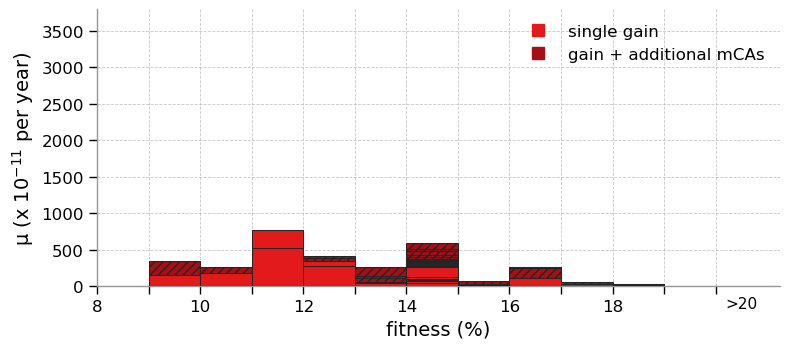

In [124]:
plot_DFE_types_of_mCA(x_dict, '+', 'multiples included')

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

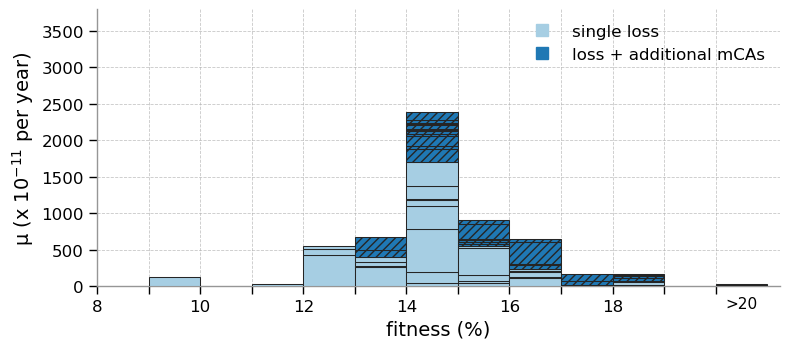

In [125]:
plot_DFE_types_of_mCA(x_dict, '-', 'multiples included')

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

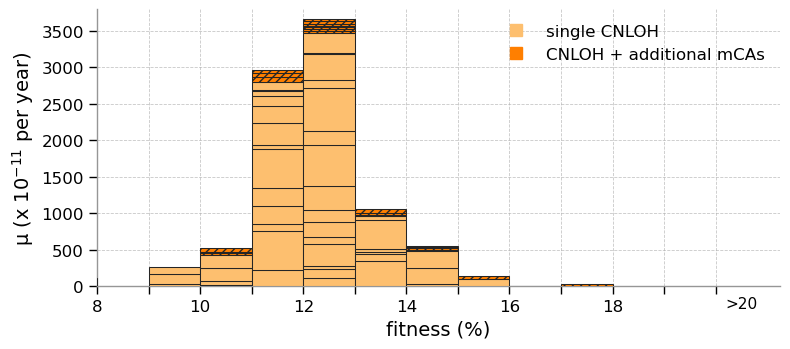

In [126]:
plot_DFE_types_of_mCA(x_dict, '=', 'multiples included')

# DFE of mCAs vs SNVs (Figure 6)

In [127]:
# SNVs
Bolton_panel_size = 1139322  # bp (v6 panel)
Bolton_haploid_mu = 7.726e-6 #from Poon 2021, Nature Genetics
Bolton_diploid_mu = Bolton_haploid_mu*2

In [128]:
def DFE(s, dip_mu, q, p): #for the DFE for SNVs
    
    density = 0.01*dip_mu*(np.exp(-((abs(s))/q)**p)/normalization) #i.e. weights/normalization (dip_mu = diploid mutation rate)
   
    return density

In [129]:
#create dictionaries of the s categories of the mCAs
x_dict_singles = {}
y_dict_singles = {}
labels_singles = []

for k, v in single_mCA_s_mu_dict.items():
    s = v['s']*100
    s_cat = s_category_2(s, k[-1])
    mu = v['mu']
    label = k
    if s_cat in x_dict_singles.keys():
        x_dict_singles[s_cat].append(label)
    else:
        x_dict_singles[s_cat]=[label]
    y_dict_singles[label]=mu

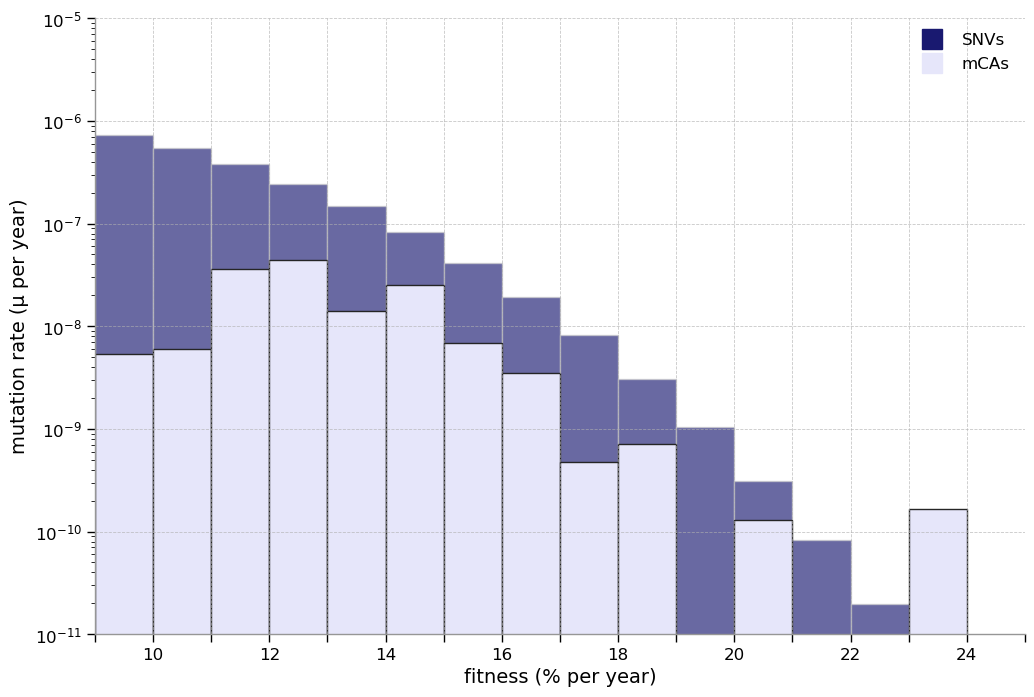

In [132]:
#mCAs vs SNVs
fig, ax1 = plt.subplots(figsize=(12, 8), nrows=1, ncols=1)
fig.subplots_adjust(hspace=0.3, wspace = 0.3)

mCA_alpha = 1.0
SNV_alpha = 0.65

#mCAs
x_values = []
height_values = []

for k, v in x_dict_singles.items():
    x = k
    base  = 0
    for mCA in v:
        mu = y_dict_singles[mCA]
        base+=mu
    x_values.append(x)
    height_values.append(base)
    ax1.bar(x, height = base, color = mCA_color, width = 1, edgecolor = grey5, lw = 1, alpha = mCA_alpha)
                
#SNVs
p = 3 #from Poon 2021, Nature Genetics
q = 0.1 #from Poon 2021, Nature Genetics
weights= lambda s: np.exp(-((abs(s))/q)**p)
normalization=integrate.quad(weights, 0.0, float("inf"))[0]

s_range=np.linspace(0.005, 0.255, 26)
DFE_vector = [DFE(s, Bolton_diploid_mu, q, p) for s in s_range]

ax1.bar(s_range*100, DFE_vector, width = 1, color = SNV_color, edgecolor = grey2, lw = 1, alpha = SNV_alpha, zorder = 0)
            
# Appearance of plot
ax1.set_xlabel('fitness (% per year)')
ax1.set_ylabel('mutation rate (\u03BC per year)')

custom_lines = [Line2D([0], [0], color=SNV_color, lw=0, marker = 's', markersize = 14),
                Line2D([0], [0], color=mCA_color, lw=0, marker = 's', markersize = 14)]

ax1.legend(custom_lines, ['SNVs', 'mCAs'])
ax1.xaxis.set_major_locator(MultipleLocator(2))
ax1.xaxis.set_minor_locator(MultipleLocator(1))
ax1.grid(zorder = 0)

x_major_ticks = [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
x_major_tick_labels = ["", "10", "", "12", "", "14", "", "16", "", "18", "", "20", "", "22", "", "24", ""]

# ax1.text(28.5, 9e-12, '>28', ha = 'center', va = 'top', fontsize = 11)
ax1.set_xticks(x_major_ticks)
ax1.set_xticklabels(x_major_tick_labels)

ax1.set_xlim(9, 25)
ax1.set_ylim(1e-11, 1e-5)

ax1.set_yscale('log')

plt.savefig('Figures/Figure_5_DFE_mCAs_vs_SNVs.pdf')

plt.show()

# Calculating total mutatation rate for each class of mCA

In [131]:
CNLOH_mu = []
gain_mu = []
loss_mu = []

for k, v in single_mCA_s_mu_dict.items():
    mCA = k
    results = v
    mu = results['mu']
    if mCA[-1]=='+':
        gain_mu.append(mu)
    if mCA[-1]=='-':
        loss_mu.append(mu)
    if mCA[-1]=='=':
        CNLOH_mu.append(mu)
        
print('total CNLOH mutation rate = ', np.sum(CNLOH_mu))
print('total gain mutation rate = ', np.sum(gain_mu))
print('total loss mutation rate = ', np.sum(loss_mu))

print('total mCA mutation rate = ', np.sum([np.sum(CNLOH_mu), np.sum(gain_mu), np.sum(loss_mu)]))

total CNLOH mutation rate =  9.033180000000001e-08
total gain mutation rate =  2.0287500000000002e-08
total loss mutation rate =  3.70105e-08
total mCA mutation rate =  1.4762980000000002e-07
